# Homework 4: Data Visualization
- **Name**:  Abdulla Badhafari
- **UB Username**: abadhafa
- **UB Person Number**: 50288848

---
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [ ]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...

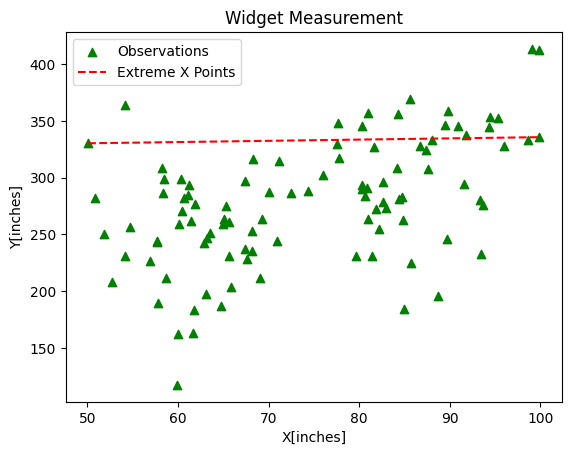

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from scatter_data.csv with specified column names
data = pd.read_csv("scatter_data.csv", skiprows=1, names=["x", "y"])

# Ignore rows with x < 0
data = data[data["x"] >= 0]

# Create a scatter plot with a line
plt.scatter(data["x"], data["y"], marker='^', color='green')

# Find the extreme x points
min_x = data["x"].min()
max_x = data["x"].max()

# Plot the line in red between extreme x points
plt.plot([min_x, max_x], [data[data["x"] == min_x]["y"].values[0], data[data["x"] == max_x]["y"].values[0]], 'r--')

# Add title and labels
plt.title("Widget Measurement")
plt.xlabel("X[inches]")
plt.ylabel("Y[inches]")

# Add a legend
plt.legend(["Observations", "Extreme X Points"])

# Display the plot
plt.show()


### Problem 2 - Histogram

In [ ]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...

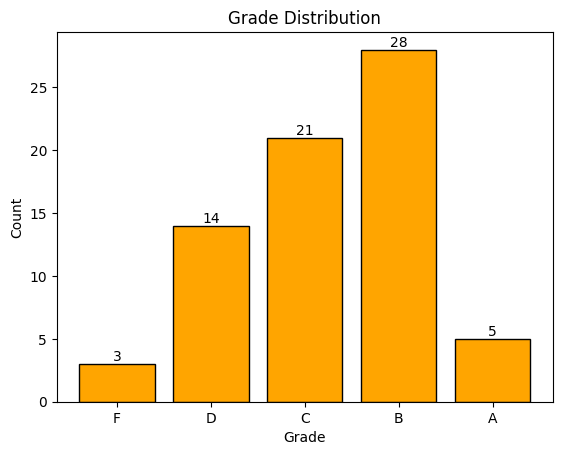

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from student_grades.csv, ignoring rows that begin with '%'
data = pd.read_csv("student_grades.csv", comment="%", names=["studentID", "avgScore"])

# Add a new column "Record Number" starting from 1
data["Record Number"] = range(1, len(data) + 1)


# Define grade bins
bins = [0, 60, 70, 80, 90, 100]

# Initialize grade counts
grade_counts = [1] * (len(bins) - 1)

# Count the number of students in each grade range
for i in range(len(bins) - 1):
    lower_bound, upper_bound = bins[i], bins[i + 1]
    count = ((data["avgScore"] >= lower_bound) & (data["avgScore"] <= upper_bound)).sum()
    grade_counts[i] = count

# Define grade labels
grades = ['F', 'D', 'C', 'B', 'A']

# Create a bar graph
plt.bar(grades, grade_counts, color='orange', edgecolor='black')

# Add counts above each bar
for grade, count in zip(grades, grade_counts):
    plt.text(grade, count, str(count), ha='center', va='bottom')

# Label axes and add a title
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Grade Distribution")

# Display the plot
plt.show()


### Problem 3 - Barplot and Boxplot in the Same Figure

In [ ]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...

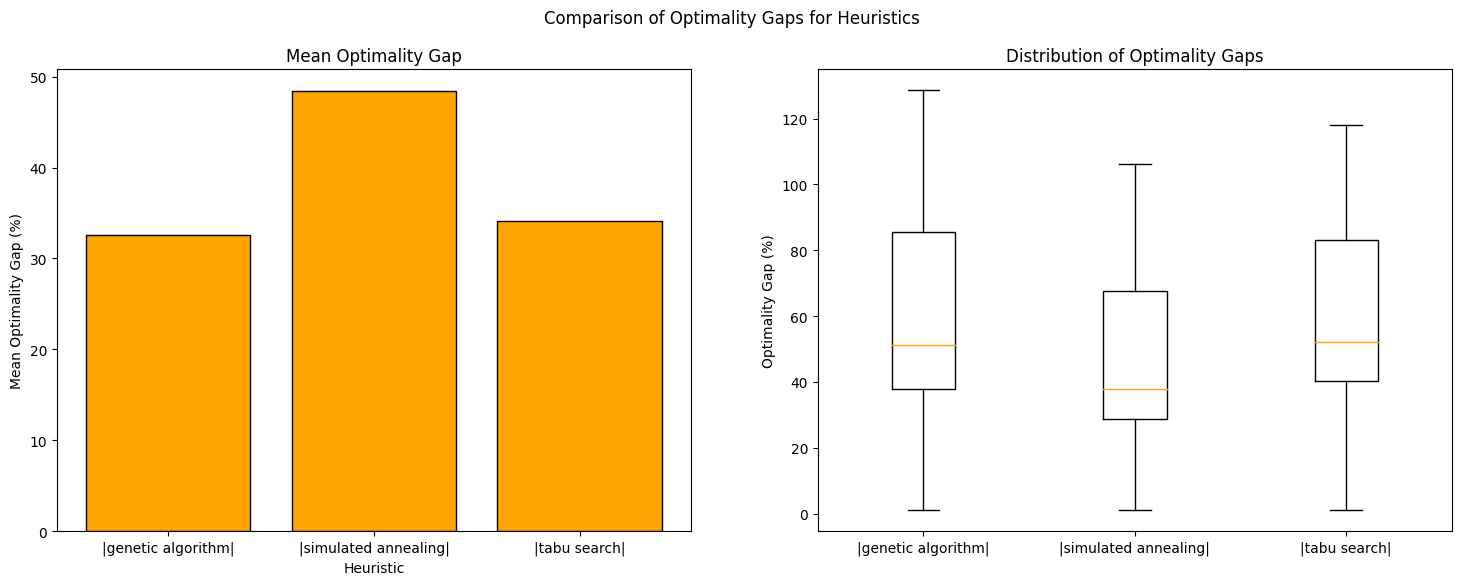

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from solution_data.csv
data = pd.read_csv("solution_data.csv", skiprows=1, names=["Problem", "SolnMethod", "Value"])

# Calculate mean gaps for each heuristic, excluding "optimal"
mean_gaps = data[data["SolnMethod"] != "|optimal|"].groupby("SolnMethod")["Value"].mean()
mean_gaps_optimal = data[data["SolnMethod"] == "|optimal|"]["Value"].mean()

# Calculate the mean gap for "optimal" as well
mean_gaps = (mean_gaps_optimal - mean_gaps) / mean_gaps_optimal * 100

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("Comparison of Optimality Gaps for Heuristics")

# First subplot - barplot (Mean Gap) without "optimal"
ax1.bar(mean_gaps.index, mean_gaps, color='orange', edgecolor='black')
ax1.set_xlabel("Heuristic")
ax1.set_ylabel("Mean Optimality Gap (%)")
ax1.set_title("Mean Optimality Gap")

# Calculate the distribution of gaps for each heuristic, excluding "optimal"
distribution_data = [data[data["SolnMethod"] == method]["Value"].values for method in mean_gaps.index]

# Second subplot - boxplot (Distribution of Gaps)
ax2.boxplot(distribution_data, labels=mean_gaps.index, medianprops={'color': 'orange'})
ax2.set_ylabel("Optimality Gap (%)")
ax2.set_title("Distribution of Optimality Gaps")

# Display the plot
plt.show()


---
## Part 2 - Explore New Plot Types

This Python code creates a radar chart using the `matplotlib` library to visualize the performance of three athletes in five different sports. Here's a brief explanation of the code:

1. It starts by importing the necessary libraries, `matplotlib` and `numpy`.

2. Data is defined, including a list of athletes, a list of sports, and a NumPy array containing performance data for each athlete in each sport.

3. The code determines the number of sports and athletes.

4. A radar chart is created using `plt.subplots(subplot_kw={'polar': True})`, which specifies a polar plot.

5. It sets the angles for the different sports to be evenly distributed around the chart.

6. The y-axis labels are configured, and the y-axis limits are set to a range from 0 to 100.

7. A loop iterates through each athlete's performance data, plotting their performance on the radar chart. The `ax.plot` function is used to draw lines connecting the data points, and `ax.fill` is used to fill the area under the lines.

8. A legend is added to label each athlete, and a title is given to the chart.

9. Finally, the radar chart is displayed using `plt.show()`.

This code is a concise way to create a radar chart to compare multiple athletes' performance in various sports visually.

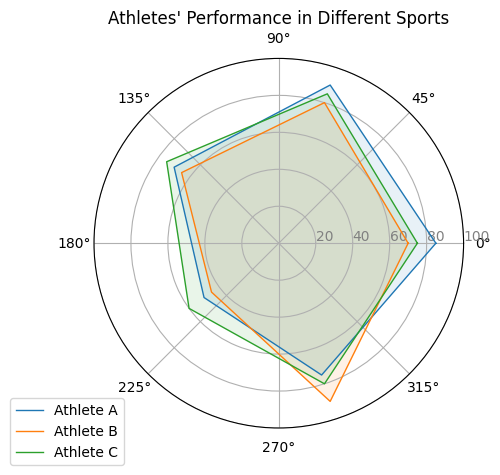

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
athletes = ['Athlete A', 'Athlete B', 'Athlete C']
sports = ['Swimming', 'Running', 'Cycling', 'Weightlifting', 'Gymnastics']

performance_data = np.array([
    [85, 90, 70, 50, 75],
    [70, 80, 65, 45, 90],
    [75, 85, 75, 60, 80]
])

# Number of sports and athletes
num_sports = len(sports)
num_athletes = len(athletes)

# Create a radar chart
fig, ax = plt.subplots(subplot_kw={'polar': True})

# Set angles for the sports
angles = np.linspace(0, 2 * np.pi, num_sports, endpoint=False).tolist()
angles += angles[:1]  # Close the plot

# Set the y-axis label
ax.set_rlabel_position(0)
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=10)
plt.ylim(0, 100)

# Plot each athlete's performance
for i in range(num_athletes):
    values = performance_data[i].tolist()
    values += values[:1]  # Close the plot
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=athletes[i])
    ax.fill(angles, values, alpha=0.1)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Athletes' Performance in Different Sports")

# Show the radar chart
plt.show()
